In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("amazon_alexa.tsv", sep="\t")
data.sample(8)

,rating,date,variation,verified_reviews,feedback
229,5,29-Jul-18,Charcoal Fabric,Best thing I've invested in in a while thank y...,1
771,4,30-Jul-18,Heather Gray Fabric,I bought this because it can control fios tele...,1
280,5,29-Jul-18,Heather Gray Fabric,Love it--- have one inside house and one by ou...,1
1083,5,30-Jul-18,White Spot,Responds easily and like the ability to do at ...,1
1715,5,28-Jul-18,Black Show,Kids like it for games. Showing the lyrics fo...,1
143,5,30-Jul-18,Charcoal Fabric,Cool,1
128,5,30-Jul-18,Charcoal Fabric,Having so much fun with Alexa. Love being able...,1
2713,5,30-Jul-18,White Dot,Super easy to hook up and program. I use the m...,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [5]:
cat = ['date', 'variation', 'verified_reviews']
num = ['rating','feedback']

In [6]:
data[cat].describe()

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


mayoritas customer memberikan ulasan pada 30 jul 2018 sebanyak 1603 ulasan

In [7]:
data[num].describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


dengan rata-rata rating antara angka 4-5 dan rata-rata memberikan feedback

In [8]:
data['length'] = data['verified_reviews'].apply(len)
data.sample(10)

,rating,date,variation,verified_reviews,feedback,length
582,4,10-Jun-18,Black,I bought it mainly to be a speaker when playin...,1,138
1541,3,30-Jul-18,Black Show,"Seems to be a good product but, unable to play...",1,125
833,5,30-Jul-18,Heather Gray Fabric,"I love the sound quality of this unit, it is a...",1,64
1228,5,26-Jul-18,White Spot,I used it as an alarm clock i lov it,1,37
1829,5,28-Jul-18,Black Plus,Love everything about this....,1,30
2308,5,30-Jul-18,Configuration: Fire TV Stick,I love my fire stick. It is so easy to use.,1,43
2047,1,14-Jul-18,White Plus,I will be returning this piece of garbage as s...,0,720
369,1,28-Jul-18,Black,not working,0,11
2792,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1,42
2544,5,30-Jul-18,Black Dot,Love it!! Don’t know what took me so long to g...,1,111


In [9]:
data.groupby('rating').describe().reset_index()
#sebaran nilai rating oleh customer

rating feedback                 ... length                              
            count mean  std  min  ...    min    25%    50%     75%     max
0      1    161.0  0.0  0.0  0.0  ...    1.0  36.00  120.0  284.00  1124.0
1      2     96.0  0.0  0.0  0.0  ...    1.0  78.75  163.0  309.25  1686.0
2      3    152.0  1.0  0.0  1.0  ...    1.0  54.00  130.0  284.00  1954.0
3      4    455.0  1.0  0.0  1.0  ...    1.0  34.00   99.0  241.00  1360.0
4      5   2286.0  1.0  0.0  1.0  ...    1.0  26.00   64.0  135.00  2851.0

[5 rows x 17 columns]

rata-rata yang memberikan rating rendah memiliki panjang kalimat yang lebih panjang dari yang lainnya, walaupun hanya 96 ulasan, tetapi kita tidak perlu bingung karena ulasan baik (rating 4-5) masih menjadi rata-rata dari ulasan itu sendiri

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


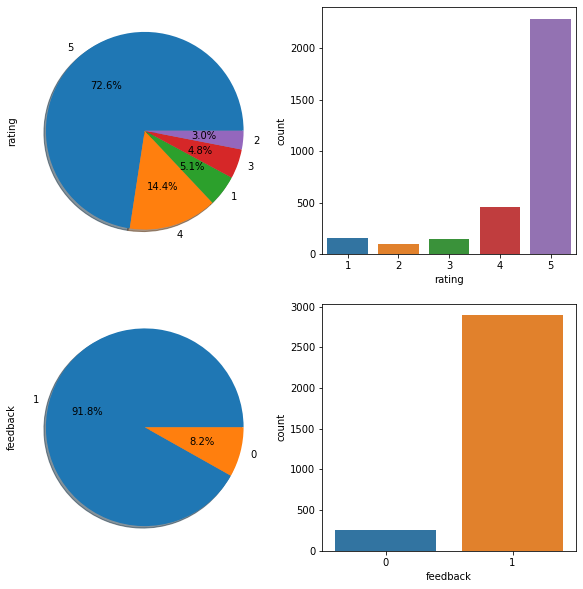

In [10]:
num_col = ['rating','feedback']
plt.figure(figsize=(10, 10))
count = 1
for cols in num_col:
    plt.subplot(2, 2, count)
    data[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    count +=1
    plt.subplot(2, 2, count)
    sns.countplot(cols, data=data)
    count+=1

Text(0.5, 1.0, 'Distribution of length')

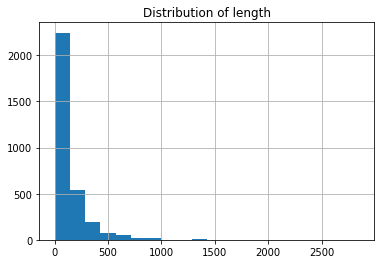

In [11]:
data['length'].hist(bins=20)
plt.title('Distribution of length')

In [12]:
import plotly
import plotly.graph_objs as go

poslens = data[data['feedback']==1]['verified_reviews'].str.len()
neglens = data[data['feedback']==0]['verified_reviews'].str.len()
fig = go.Figure()
fig.add_trace(
    go.Histogram(x=poslens, xbins=dict(size=200), name='1'),
    )
fig.add_trace(
    go.Histogram(x=neglens, xbins=dict(size=200), name='0'),
    )
fig.update_layout(title='Length of reviews', 
                    xaxis_title="Length",
                    yaxis_title="# of reviews",)
plotly.offline.iplot(fig)

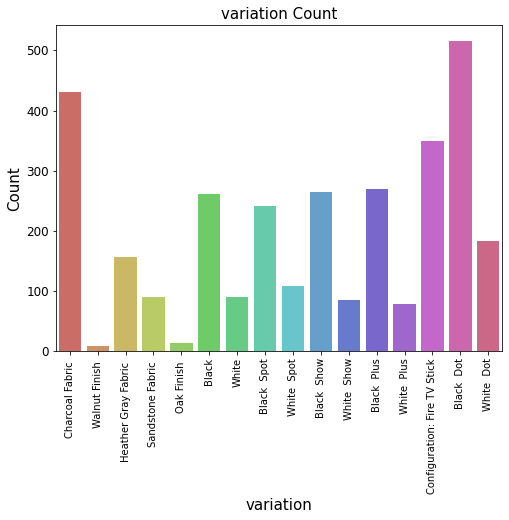

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='variation', data=data, palette="hls")
plt.xlabel("variation", fontsize=15) #seting the xtitle and size
plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
plt.title("variation Count", fontsize=15) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)
plt.show()

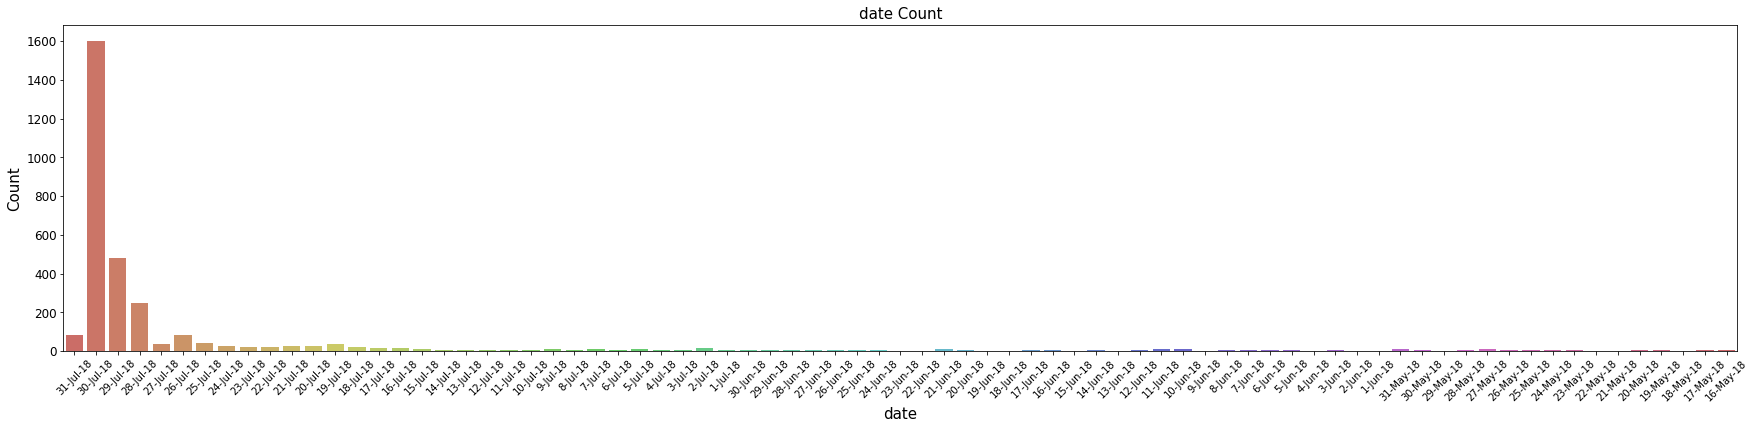

In [14]:
plt.figure(figsize=(30,6))
sns.countplot(x='date', data=data, palette="hls")
plt.xlabel("date", fontsize=15) #seting the xtitle and size
plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
plt.title("date Count", fontsize=15) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

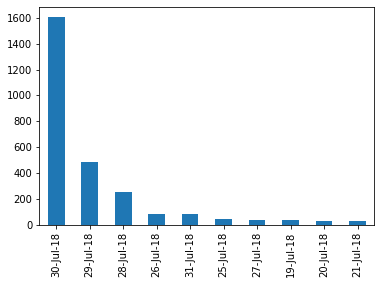

In [16]:
date_top10 = pd.DataFrame(data['date'].value_counts()[0:10])
date_top10.date.plot.bar()#lonjakan ulasan pada tanggal 30 jul 2018

In [17]:
data['month'] = pd.DatetimeIndex(data['date']).month
data['weekday'] = pd.DatetimeIndex(data['date']).weekday
data.head()

,rating,date,variation,verified_reviews,feedback,length,month,weekday
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,7,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,7,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,7,1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,7,1
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,7,1


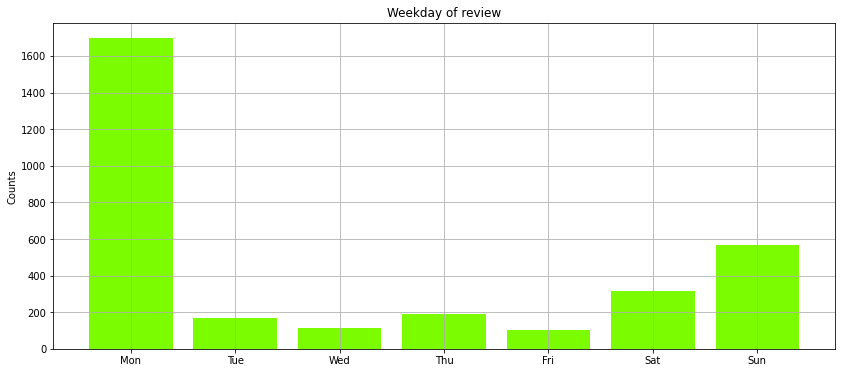

In [18]:
plt.rcParams['figure.figsize'] = (14,6)
data['weekday'].hist(bins=7,color='lawngreen',range = (-.5,6.5),rwidth=.8)
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split());
plt.ylabel('Counts')
plt.title('Weekday of review')
plt.show()#terjadi lonjakan ulasan pada hari senin

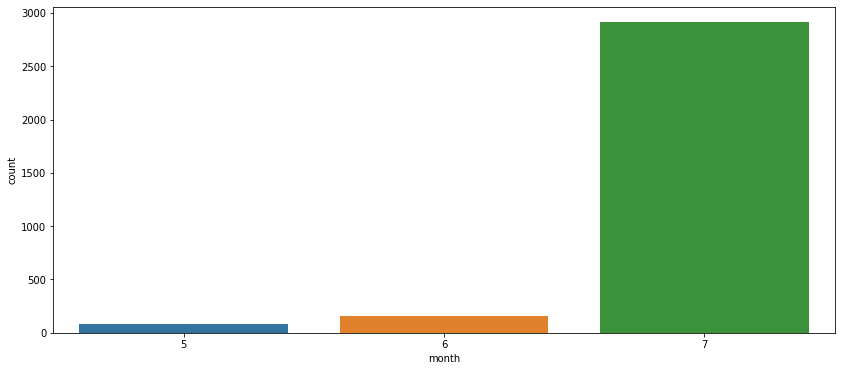

In [19]:
sns.countplot(x = 'month', data = data)
#terjadi lonjakan ulasan pada bulan juli

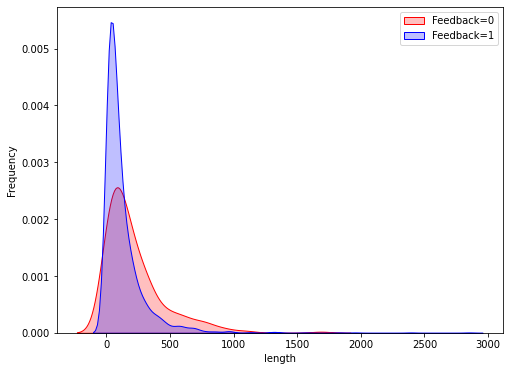

In [20]:
plt.figure(figsize=(8, 6))
g = sns.kdeplot(data["length"][(data["feedback"] == 0) & (data["length"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data["length"][(data["feedback"] == 1) & (data["length"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("length")
g.set_ylabel("Frequency")
g = g.legend(["Feedback=0","Feedback=1"])

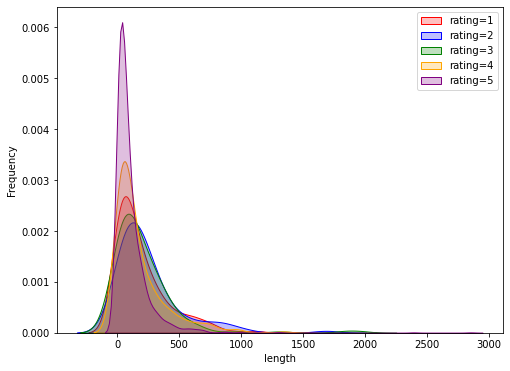

In [21]:
plt.figure(figsize=(8, 6))
g = sns.kdeplot(data["length"][(data["rating"] == 1) & (data["length"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data["length"][(data["rating"] == 2) & (data["length"].notnull())], ax =g, color="Blue", shade= True)
g = sns.kdeplot(data["length"][(data["rating"] == 3) & (data["length"].notnull())], color="Green", shade = True)
g = sns.kdeplot(data["length"][(data["rating"] == 4) & (data["length"].notnull())], color="Orange", shade = True)
g = sns.kdeplot(data["length"][(data["rating"] == 5) & (data["length"].notnull())], color="Purple", shade = True)
g.set_xlabel("length")
g.set_ylabel("Frequency")
g = g.legend(["rating=1","rating=2","rating=3","rating=4","rating=5"])

perlu menjadi perhatian karena ulasan dengan rating antara 1,2,3 tidak diberikan umpan balik

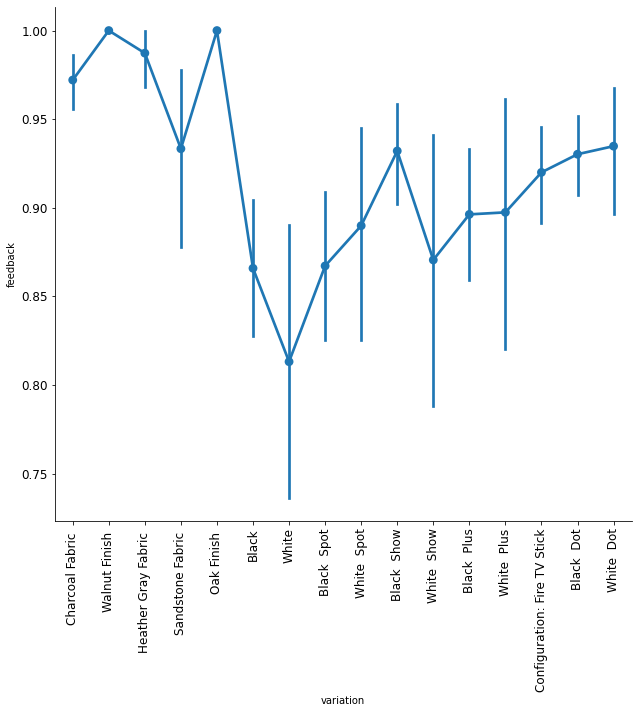

In [29]:
sns.catplot(x='variation',y='feedback',kind='point',data=data)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)
plt.show()#rata-rata pemberian feedback terhadap variation

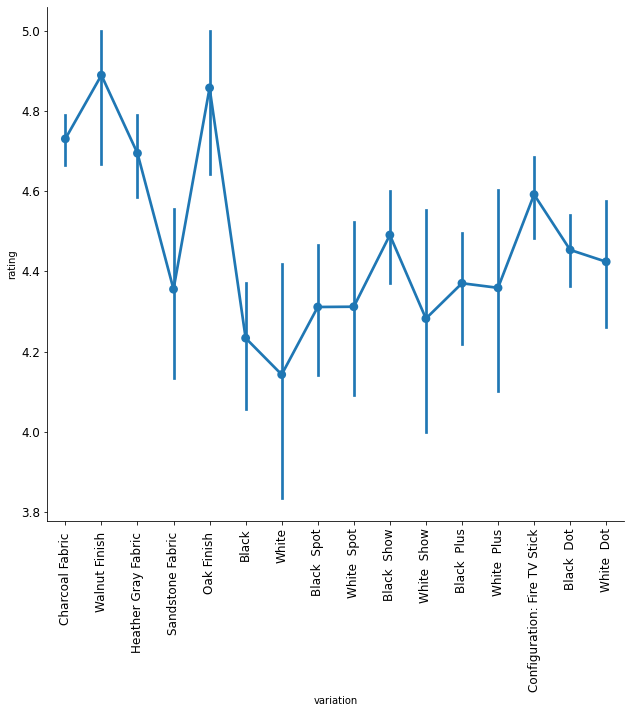

In [30]:
sns.catplot(x='variation',y='rating',kind='point',data=data)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=90)
plt.show()#rata-rata pemberian rating terhadap variation

In [31]:
#Step 1: transform to lowercase
data['review_lower'] = data['verified_reviews'].str.lower()
data.head(8)

,rating,date,variation,verified_reviews,feedback,length,month,weekday,review_lower
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,7,1,love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,7,1,loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,7,1,"sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,7,1,i have had a lot of fun with this thing. my 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,7,1,music
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,172,7,1,i received the echo as a gift. i needed anothe...
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,365,7,1,"without having a cellphone, i cannot use many ..."
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221,7,1,i think this is the 5th one i've purchased. i'...


In [33]:
#Step 2: Removing HTML Tags
from bs4 import BeautifulSoup
data['review_lower'] = data['review_lower'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())
data.head(8)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning:

"https://www.amazon.com/dp/b073sqyxtw/ref=cm_cr_ryp_prd_ttl_sol_18" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



,rating,date,variation,verified_reviews,feedback,length,month,weekday,review_lower
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,7,1,love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,7,1,loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,7,1,"sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,7,1,i have had a lot of fun with this thing. my 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,7,1,music
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,172,7,1,i received the echo as a gift. i needed anothe...
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,365,7,1,"without having a cellphone, i cannot use many ..."
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221,7,1,i think this is the 5th one i've purchased. i'...


In [41]:
#Step 3: remove stopwords 'n punctuation
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
sw = stopwords.words('english')
def transform_text(s):
    
    # remove html
    html=re.compile(r'<.*?>')
    s = html.sub(r'',s)
    
    # remove numbers
    s = re.sub(r'\d+', '', s)
    
    # remove punctuation
    # remove stopwords
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        # remove words with len = 2 AND stopwords
        if len(w) > 2 and w not in sw:
            new_string.append(w)
 
    s = ' '.join(new_string)
    s = s.strip()

    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)
    
    return s.strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
data['review_sw'] = data['review_lower'].apply(transform_text)
data[['verified_reviews','review_lower', 'review_sw']].head(8)

,verified_reviews,review_lower,review_sw
0,Love my Echo!,love my echo!,love echo
1,Loved it!,loved it!,loved
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...",sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,lot fun thing old learns dinosaurs control lig...
4,Music,music,music
5,I received the echo as a gift. I needed anothe...,i received the echo as a gift. i needed anothe...,received echo gift needed another bluetooth so...
6,"Without having a cellphone, I cannot use many ...","without having a cellphone, i cannot use many ...",without cellphone use many features ipad see u...
7,I think this is the 5th one I've purchased. I'...,i think this is the 5th one i've purchased. i'...,think one ve purchased working getting one eve...


In [46]:
#Step 4: lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
def lemmatizer_text(s):
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        lem = lemmatizer.lemmatize(w, pos="v")
        # exclude if lenght of lemma is smaller than 2
        if len(lem) > 2:
            new_string.append(lem)
    
    s = ' '.join(new_string)
    return s.strip()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [47]:
data['review_lemma'] = data['review_sw'].apply(lemmatizer_text)
data[['verified_reviews','review_lower', 'review_sw', 'review_lemma']].head(8)



,verified_reviews,review_lower,review_sw,review_lemma
0,Love my Echo!,love my echo!,love echo,love echo
1,Loved it!,loved it!,loved,love
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...",sometimes playing game answer question correct...,sometimes play game answer question correctly ...
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,lot fun thing old learns dinosaurs control lig...,lot fun thing old learn dinosaurs control ligh...
4,Music,music,music,music
5,I received the echo as a gift. I needed anothe...,i received the echo as a gift. i needed anothe...,received echo gift needed another bluetooth so...,receive echo gift need another bluetooth somet...
6,"Without having a cellphone, I cannot use many ...","without having a cellphone, i cannot use many ...",without cellphone use many features ipad see u...,without cellphone use many feature ipad see us...
7,I think this is the 5th one I've purchased. I'...,i think this is the 5th one i've purchased. i'...,think one ve purchased working getting one eve...,think one purchase work get one every room hou...


In [48]:
#Step 5: Removing Rare Words
text = ' '.join(data['review_lemma'])
len(text)

241100

In [51]:
# Creating Frequency
text_series = pd.Series(text.split())
freq_comm = text_series.value_counts()
freq_comm

love        1060
echo         858
great        720
use          681
work         648
            ... 
gain           1
kong           1
cotton         1
pagesthe       1
plugins        1
Length: 3234, dtype: int64

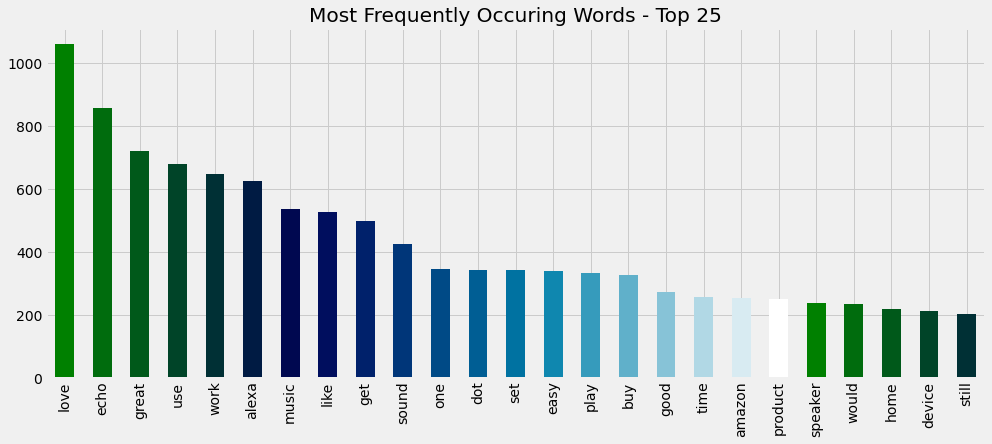

In [55]:
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
freq_comm.head(25).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 25")
plt.show()

In [52]:
rare_words = freq_comm[-1258:-1]
'rattlecrackle' in rare_words
rare_words

resemble       1
til            1
mimic          1
existent       1
unimportant    1
              ..
lcd            1
gain           1
kong           1
cotton         1
pagesthe       1
Length: 1257, dtype: int64

In [53]:
# Removing 1258 rare occuring words 
data['review_lemma'] = data['review_lemma'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare_words]))
data['review_lemma'].head(8)

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing old learn control light play gam...
4                                                music
5    receive echo gift need another bluetooth somet...
6    without cellphone use many feature ipad see us...
7    think one purchase work get one every room hou...
Name: review_lemma, dtype: object

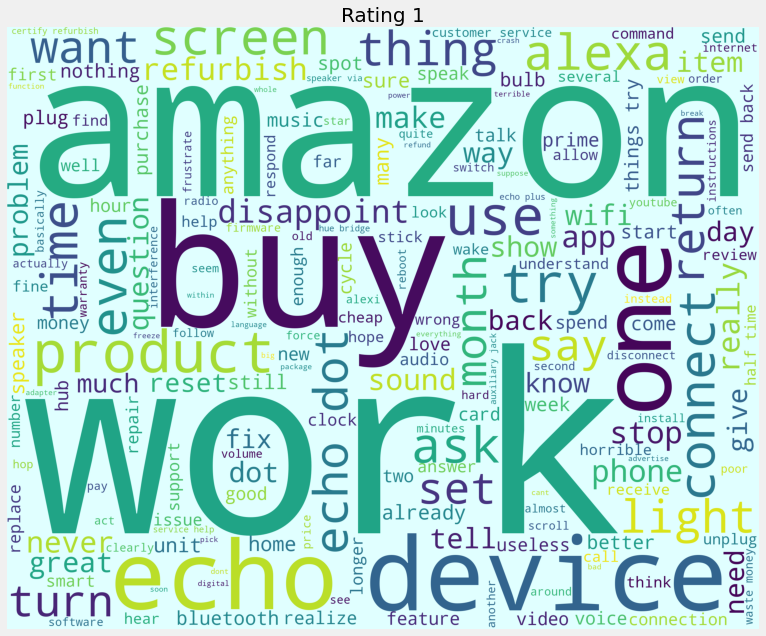

In [62]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

data_r1 = data[data['rating']==1]['review_lemma']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color = 'lightcyan',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_r1))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.title('Rating 1',size=20)
plt.axis('off')
plt.show()

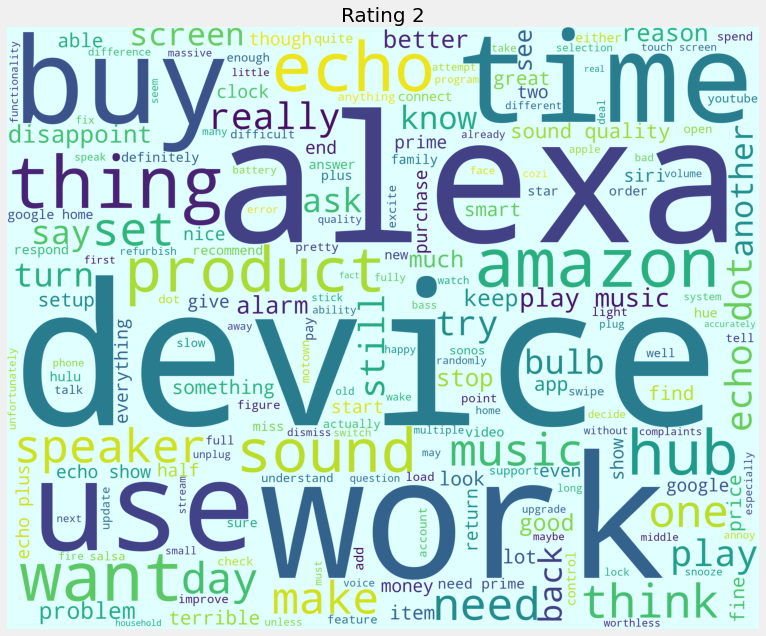

In [63]:
data_r2 = data[data['rating']==2]['review_lemma']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color = 'lightcyan',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_r2))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.title('Rating 2',size=20)
plt.axis('off')
plt.show()

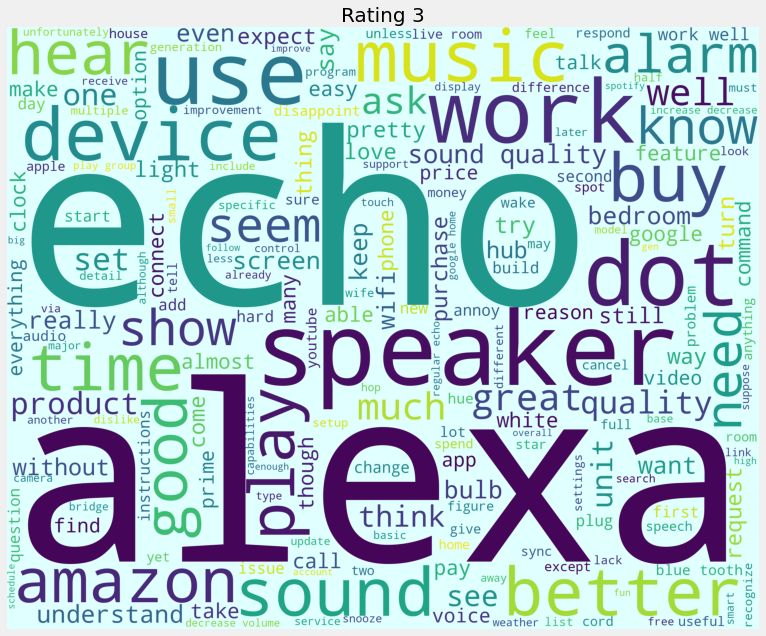

In [64]:
data_r3 = data[data['rating']==3]['review_lemma']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color = 'lightcyan',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_r3))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.title('Rating 3',size=20)
plt.axis('off')
plt.show()

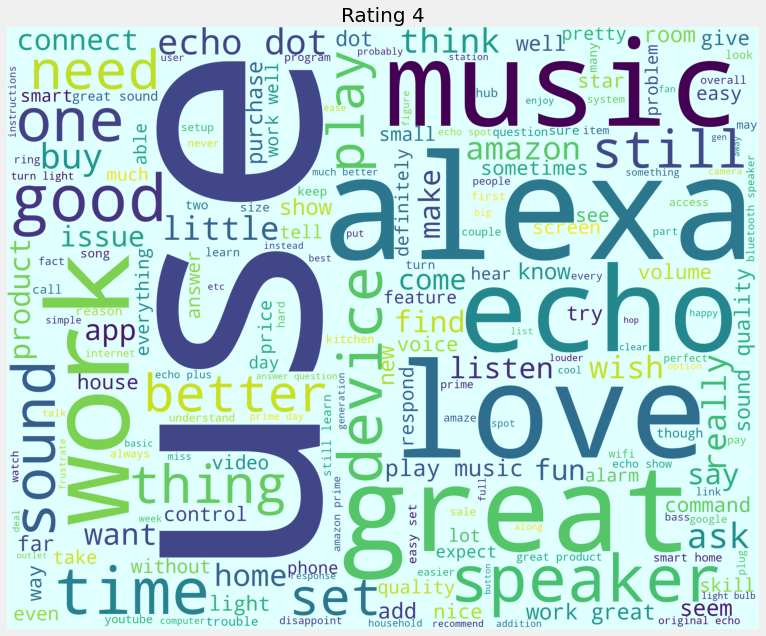

In [65]:
data_r4 = data[data['rating']==4]['review_lemma']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color = 'lightcyan',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_r4))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.title('Rating 4',size=20)
plt.axis('off')
plt.show()

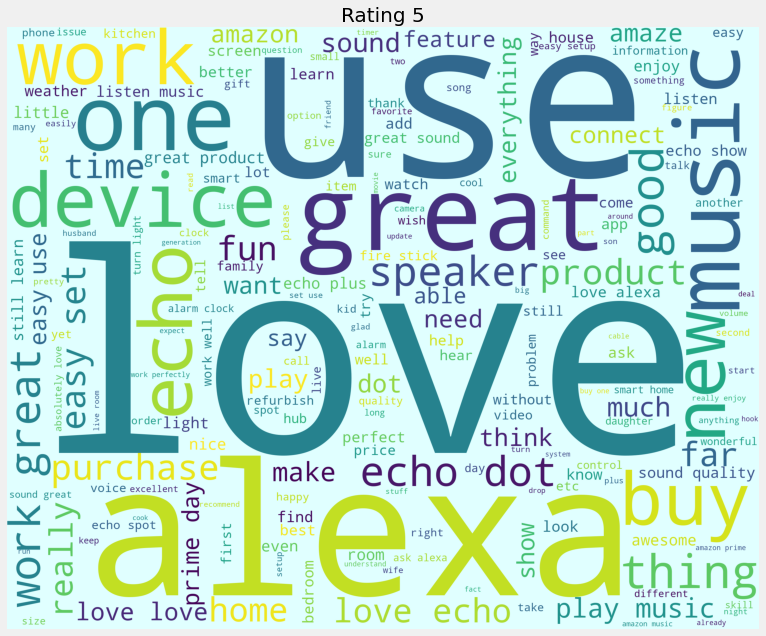

In [66]:
data_r5 = data[data['rating']==5]['review_lemma']
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color = 'lightcyan',
                      width=2500,
                      height=2000
                      ).generate(" ".join(data_r5))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.title('Rating 5',size=20)
plt.axis('off')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#look predict by rating
X = data['review_lemma']
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)
vecto = CountVectorizer(binary=True)
X_train_vecto = vecto.fit_transform(X_train)
X_test_vecto = vecto.transform(X_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rf = RandomForestClassifier(random_state = 75)
rf.fit(X_train_vecto, y_train)
print(classification_report(y_test, rf.predict(X_test_vecto)))

              precision    recall  f1-score   support

           1       0.45      0.19      0.27        26
           2       1.00      0.18      0.31        22
           3       0.87      0.38      0.53        34
           4       0.59      0.36      0.45        88
           5       0.82      0.97      0.89       460

    accuracy                           0.80       630
   macro avg       0.75      0.42      0.49       630
weighted avg       0.78      0.80      0.76       630



In [73]:
rf3 = RandomForestClassifier(class_weight = 'balanced')
rf3.fit(X_train_vecto, y_train)
print(classification_report(y_test, rf3.predict(X_test_vecto)))

              precision    recall  f1-score   support

           1       0.50      0.23      0.32        26
           2       1.00      0.18      0.31        22
           3       0.39      0.47      0.43        34
           4       0.65      0.38      0.47        88
           5       0.82      0.93      0.88       460

    accuracy                           0.78       630
   macro avg       0.67      0.44      0.48       630
weighted avg       0.77      0.78      0.75       630



In [71]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_vecto, y_train)
print(classification_report(y_test, NB.predict(X_test_vecto)))

              precision    recall  f1-score   support

           1       0.56      0.19      0.29        26
           2       0.50      0.05      0.08        22
           3       0.62      0.15      0.24        34
           4       0.35      0.24      0.28        88
           5       0.80      0.96      0.87       460

    accuracy                           0.75       630
   macro avg       0.57      0.32      0.35       630
weighted avg       0.71      0.75      0.71       630



In [72]:
from xgboost import XGBClassifier
classifier1 = XGBClassifier()
classifier1.fit(X_train_vecto, y_train)
print(classification_report(y_test, classifier1.predict(X_test_vecto)))

              precision    recall  f1-score   support

           1       0.33      0.08      0.12        26
           2       1.00      0.09      0.17        22
           3       0.20      0.03      0.05        34
           4       0.52      0.12      0.20        88
           5       0.77      0.99      0.86       460

    accuracy                           0.75       630
   macro avg       0.56      0.26      0.28       630
weighted avg       0.69      0.75      0.67       630



dan terlihat memprediksi nilai klasifikasi yang sifatnya non binary jauh lebih sulit untuk mendapatkan nilai akurasi yang tinggi, sepertinya jalan pintasnya adalah membuat one hot encoding tetapi hal tersebut tentu memerlukan sistem yang kompleks dalam implementasinya

sekarang kita coba memprediksi nilai feedbacknya

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#look predict by rating
X = data['review_lemma']
y1 = data['feedback']
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=75)
vecto = CountVectorizer(binary=True)
X_train_vecto = vecto.fit_transform(X_train)
X_test_vecto = vecto.transform(X_test)

In [82]:
#use by deep learning
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [83]:
# create the tokenizer
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
Xtrain = tokenizer.texts_to_matrix(X_train, mode='count')

# encode training data set
Xtest = tokenizer.texts_to_matrix(X_test, mode='count')

n_words1 = Xtest.shape[1]

print("n_words1", n_words1)

n_words1 1952


In [84]:
model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(300, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [85]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['acc'])

#print(model.summary())

In [86]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
history = model.fit(Xtrain, y_train1,
                    epochs=50,
                    validation_data=(Xtest, y_test1,),
                    verbose=1,
                    callbacks=callbacks,
                   )

Epoch 1/50
79/79 [==============================] - 1s 8ms/step - loss: 1.0192 - acc: 0.5020 - val_loss: 0.7022 - val_acc: 0.4095
Epoch 2/50
79/79 [==============================] - 0s 6ms/step - loss: 0.8306 - acc: 0.5879 - val_loss: 0.6943 - val_acc: 0.5095
Epoch 3/50
79/79 [==============================] - 0s 6ms/step - loss: 0.7554 - acc: 0.6266 - val_loss: 0.6535 - val_acc: 0.7238
Epoch 4/50
79/79 [==============================] - 0s 6ms/step - loss: 0.7512 - acc: 0.6483 - val_loss: 0.6089 - val_acc: 0.8063
Epoch 5/50
79/79 [==============================] - 0s 6ms/step - loss: 0.6710 - acc: 0.6758 - val_loss: 0.5528 - val_acc: 0.8508
Epoch 6/50
79/79 [==============================] - 0s 6ms/step - loss: 0.6011 - acc: 0.7047 - val_loss: 0.5059 - val_acc: 0.8714
Epoch 7/50
79/79 [==============================] - 0s 6ms/step - loss: 0.5892 - acc: 0.7258 - val_loss: 0.4637 - val_acc: 0.8889
Epoch 8/50
79/79 [==============================] - 0s 6ms/step - loss: 0.5503 - acc: 0.75

dan didapatkan nilai akurasi yang jauh lebih tinggi untuk memprediksi nilai feedback